# Logit in python

**Model:** for a matrix of true parameters, $\beta$ (which is $K_x \times K_z$): $$ \Pr (j|x_i, z; \beta) = \frac{\exp(x_i \beta z_j)}{\sum_{k=1}^J \exp(x_i \beta z_k)}, \quad j=1,...,J $$

**Data:** We simulate demographics, $x_i \in \mathbb{R}^{K_x}$, as IID normals. We also simulate characteristics for each of the $J$ alternatives as $z_j \in \mathbb{R}^{K_z}$, also normally distributed. 

**Simulated choices:** Based on the data $(x_i,z_j)$, we can calculate conditional choice probabilities (CCPs) for the true parameters. We can then use those to simulate discrete choices $d_i \in {1,...,J}$ for all $i = 1,...,N$. 

**Optimization problem:** find the global optimum of the log likelihood function, equivalent to minimizing the negative log likelihood:
$$ \min_\beta -L(\beta) = - N^{-1} \sum_{i=1}^N \log \Pr (d_i|z_i, x_j; \beta) $$

In [ ]:
from scipy import optimize

In [1]:
import numpy as np 

%load_ext autoreload
%autoreload 1

%aimport logit

# Model setup 

Ideally, we want $N = 1$ million, $J = 200$, $K_z = K_x = 5$. 

In [2]:
N = 10000
J = 3
Kz = 3
Kx = 2

x,z = logit.simulate_demographics(N,J,Kz,Kx)
beta = np.random.normal(0,1,size=(Kx,Kz))
ccp = logit.ccps(x,z,beta)
d = logit.simulate_choices(ccp)

# Time the criterion function

In [3]:
import time

In [4]:
nit = 100
times = np.empty((nit,),dtype=float)

for it in range(nit): 
    t = time.time() 
    f = logit.neg_ll(beta*np.random.normal(loc=1.0,scale=0.01), x,z,d)
    times[it] = time.time() - t
    
f0 = logit.neg_ll(beta,x,z,d)    
print(f'negll at truth = {f0: 8.4f}. Mean time/eval = {np.mean(times) : 10.4g}')

negll at truth =   0.4224. Mean time/eval =   0.002186


# Monte Carlo

Here, we run $R$ iterations where each time, we simulate choice data (from the choice probabilities computed based on the true parameters) and estimate all parameters based on that dataset. 

In [52]:
betahats = logit.monte_carlo(x,z,beta,R=1000,method='Nelder-Mead')

MC done. Mean nit = 19.869; mean time =  0.27 sec/est. Number of failures = 0


Plot a histogram of one of the parameters. 

--- Monte carlo results over R=1000 simulations ---
beta_00: truth =  -2.2145, MC mean =  -2.2180 (P10 =  -2.2849, P90 =  -2.1528)
Horizontal red line indicates the truth (beta_00 =  -2.2145)


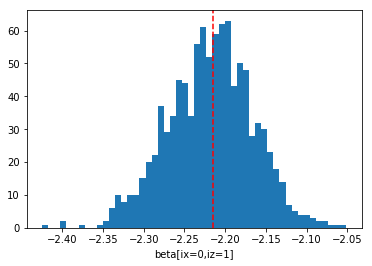

In [54]:
logit.analyze_monte_carlo_estimates(beta, betahats, ix=0, iz=1)